The usual suspects - imports. You only need run this once.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load the data and split it into features vs labels subsets. Again, only need to run it once.

In [4]:
wine_data = pd.read_csv("../WineQT.csv", delimiter=",")
wine_features = wine_data.drop("quality", axis=1).drop("Id", axis=1)
wine_labels = np.ravel(wine_data['quality'])

Check the data samples.

In [5]:
wine_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [6]:
wine_labels

array([5, 5, 5, ..., 5, 6, 5], shape=(1143,))

Split the dataset into train and test subsets, as is common.

NOTE: While it may be tempting to get creative with variable names, such as `features_train`, `features_test`, `labels_train`, `labels_test`, etc., it's been proven it's WAY TOO MUCH typing, ends up being too confusing, and most examples use `x` for features (as in, input data) and `y` for labels (as in, results).

In [15]:
x_train, x_test, y_train, y_test = train_test_split(wine_features, wine_labels, test_size=0.2, random_state=50)

Again, verify the data set sizes and samples.

In [16]:
print("train:", len(x_train), "test:", len(x_test))

train: 914 test: 229


In [17]:
print("sample:\n", resample(x_train, n_samples=5))

sample:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
287             9.9              0.40         0.53             6.7      0.097   
147             7.8              0.44         0.28             2.7      0.100   
177            11.1              0.35         0.48             3.1      0.090   
1094            7.2              0.53         0.13             2.0      0.058   
305            10.4              0.41         0.55             3.2      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
287                   6.0                  19.0  0.99860  3.27       0.82   
147                  18.0                  95.0  0.99660  3.22       0.67   
177                   5.0                  21.0  0.99860  3.17       0.53   
1094                 18.0                  22.0  0.99573  3.21       0.68   
305                  22.0                  54.0  0.99960  3.15       0.89   

      alcohol  
287      11.7  
147      

Note that the data above is distributed along different ranges in the columns. We need to normalise it, meaning spreading all of it on a scale `a..b`, where `a` and `b` are the same for each column.

In [18]:
scaler = StandardScaler().fit(x_train)
nx_train = scaler.transform(x_train)
nx_test = scaler.transform(x_test)

Review the data set now.

In [19]:
print("normalised sample:\n", resample(nx_train, n_samples=5))

normalised sample:
 [[-0.36337554  0.30744761 -0.88665518 -0.56520518  0.37265697  1.25154072
   1.96409859 -0.55957907 -1.4666001  -1.03970354 -0.61549675]
 [-0.75789051 -0.09066002 -0.93801151 -0.3273245  -0.54314184 -1.14742793
  -1.15154328 -0.46240645  0.24877775 -0.72667599  0.03054512]
 [-0.58881267  0.93304531  0.24318401 -0.24803095 -0.38287705  1.95123991
   1.80831649 -0.21691774  0.12171272 -0.91449252 -0.89237183]
 [-1.7159983   0.25057509 -1.34886212 -0.64449874 -0.7263016  -1.0474709
  -0.59072774 -1.71030739  1.64649303  1.15148931  1.87637902]
 [ 0.31293584  1.27428042 -0.68122987 -0.01015027  0.00633745 -0.6476428
  -0.49725849  0.76503709  0.18524524 -0.10062089  0.03054512]]


Time to rock & roll! Let's train the SVC model.

In [26]:
print("**** TESTING C-Support Vector Classification ****")

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(nx_train, y_train)

# now test the fitness with the test subset
svc_y_predict = svc_model.predict(nx_test)

# visualise it
print("x: predictions, y: labels")
svc_cm = np.array(confusion_matrix(y_test, svc_y_predict, labels=[0,1,2,3,4,5,6,7,8,9,10]))
svc_conf_matrix = pd.DataFrame(svc_cm)
print(svc_conf_matrix)

**** TESTING C-Support Vector Classification ****
x: predictions, y: labels
    0   1   2   3   4   5   6   7   8   9   10
0    0   0   0   0   0   0   0   0   0   0   0
1    0   0   0   0   0   0   0   0   0   0   0
2    0   0   0   0   0   0   0   0   0   0   0
3    0   0   0   0   0   2   0   0   0   0   0
4    0   0   0   0   0   6   4   1   0   0   0
5    0   0   0   0   0  78  21   0   0   0   0
6    0   0   0   0   0  29  50   0   0   0   0
7    0   0   0   0   0   1  27   9   0   0   0
8    0   0   0   0   0   0   1   0   0   0   0
9    0   0   0   0   0   0   0   0   0   0   0
10   0   0   0   0   0   0   0   0   0   0   0


Visualise the SVC model performance in a nice heatmap graph.

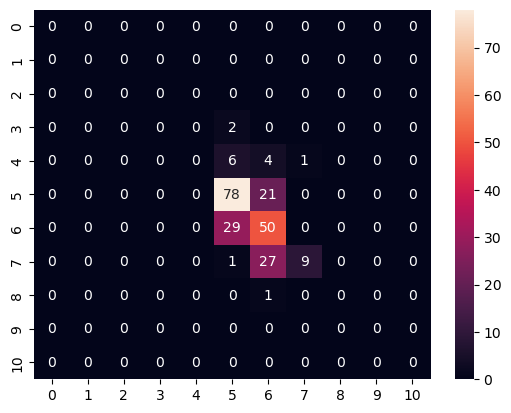

In [27]:
sns.heatmap(svc_conf_matrix, annot=True, fmt='g')
plt.show()

Try another, simpler, visualisation.

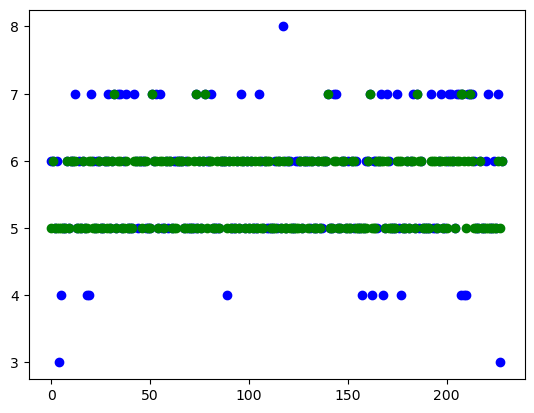

In [31]:
plt.scatter(range(0, len(y_test)), y_test, color = 'blue')
plt.scatter(range(0, len(y_test)), svc_y_predict, color = 'green')

Now let's try and train the NuSVC model, too.

In [28]:
print("**** TESTING Nu-Support Vector Classification ****")

from sklearn.svm import NuSVC

nusvc_model = NuSVC(nu=0.015)
nusvc_model.fit(nx_train, y_train)

# now test the fitness with the test subset
nusvc_y_predict = svc_model.predict(nx_test)

# visualise it
print("x: predictions, y: labels")
nu_cm = np.array(confusion_matrix(y_test, nusvc_y_predict, labels=[0,1,2,3,4,5,6,7,8,9,10]))
nu_conf_matrix = pd.DataFrame(nu_cm)
print(nu_conf_matrix)

**** TESTING Nu-Support Vector Classification ****
x: predictions, y: labels
    0   1   2   3   4   5   6   7   8   9   10
0    0   0   0   0   0   0   0   0   0   0   0
1    0   0   0   0   0   0   0   0   0   0   0
2    0   0   0   0   0   0   0   0   0   0   0
3    0   0   0   0   0   2   0   0   0   0   0
4    0   0   0   0   0   6   4   1   0   0   0
5    0   0   0   0   0  78  21   0   0   0   0
6    0   0   0   0   0  29  50   0   0   0   0
7    0   0   0   0   0   1  27   9   0   0   0
8    0   0   0   0   0   0   1   0   0   0   0
9    0   0   0   0   0   0   0   0   0   0   0
10   0   0   0   0   0   0   0   0   0   0   0


Visualise the NuSVC model performance in a nice heatmap graph as well.

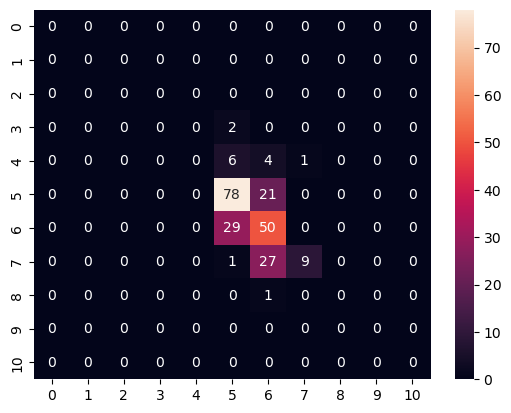

In [29]:
# visualise the NuSVC model in a nice picture
sns.heatmap(nu_conf_matrix, annot=True, fmt='g')
plt.show()

Similarly, try the 2D visualisation.

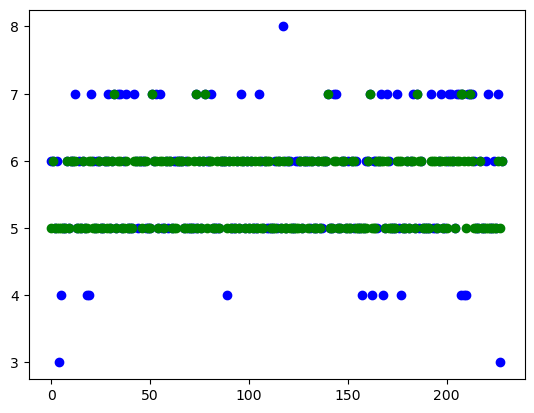

In [32]:
plt.scatter(range(0, len(y_test)), y_test, color = 'blue')
plt.scatter(range(0, len(y_test)), nusvc_y_predict, color = 'green')

It would appear that in this case, and with all the default settings, there is no difference beteren `SVC` and `NuSVC` models.

Let's try our luck with a regression model as well - `SVR` is one such possibility.

In [34]:
print("**** TESTING C-Support Vector Regression ****")

from sklearn.svm import SVR

svr_model = SVR(kernel="rbf")
svr_model.fit(x_train, y_train)

# now test the fitness with the test subset
svr_y_predict = svr_model.predict(x_test)

**** TESTING C-Support Vector Regression ****


Again, try a 2D visualisation of results.

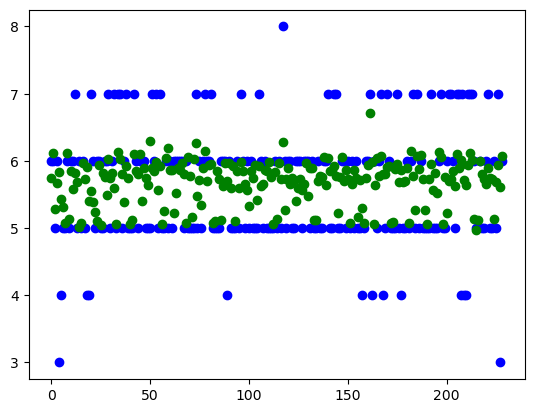

In [35]:
plt.scatter(range(0, len(y_test)), y_test, color = 'blue')
plt.scatter(range(0, len(y_test)), svr_y_predict, color = 'green')

Feel free to take this on and play with it some more. What is there to do? Here are some ideas:

* improve visualisations
* experiment with model settings
* try different train/test sizes
